# In-class exercise

1.   Generate the Dataset
2.   Build a Polynomial Regression Model
3.   Implement Gradient Descent Algorithms (BGD, MGD, SGD)
4.   Visualize Parameter Updates
5.   Implement Early Stopping


## 1.Generate the Dataset(10%)
Use the following polynomial equation to generate data with random noise.


$y = 0.75x^5 + 0.12x^4 + 0.2x^3 + 0.5x^2 + 1.5x + 1 + noise$



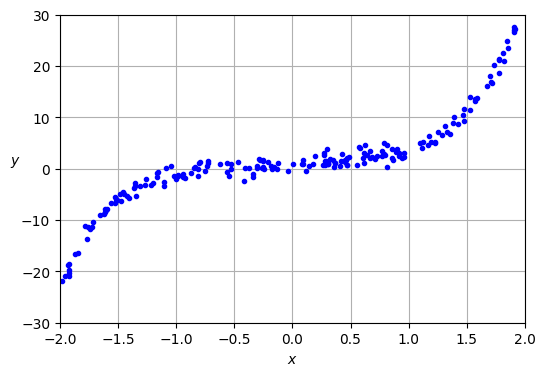

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')

# Generate array which shape is (200, 1) and between [0, 1)
np.random.seed(0)
num_samples = 200
X = 4 * np.random.rand(num_samples, 1) - 2
noise = np.random.randn(num_samples, 1)

y = 0.75 * X ** 5 + 0.12 * X ** 4 + 0.2 * X ** 3 + 0.5 * X ** 2 + 1.5 * X + 1 + noise

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x$")
plt.ylabel("$y$", rotation=0)
plt.axis([-2, 2, -30, 30])
plt.grid()
plt.show()

## 2.Build a Polynomial Regression Model(15%)

Coefficients of Polynomial Regression: 0.179, 0.191, 0.164, 0.361, 0.311, 0.815


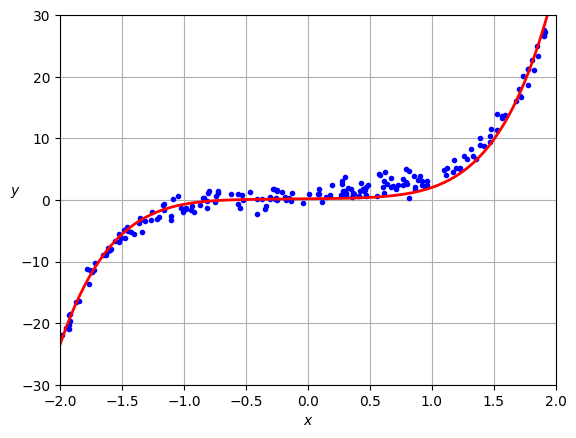

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Build a polynomial regression model
class PolynomialRegression:
    def __init__(self, degree: int) -> None:
        np.random.seed(0)
        self.degree = degree
        self.poly_features = PolynomialFeatures(degree=degree)
        self.weights = np.random.randn(degree+1, 1) * 0.01
        
    def train(self, X_train: np.ndarray, y_train: np.ndarray, learning_rate=0.001, epochs=100):
        X_train_poly = self.poly_features.fit_transform(X_train)
        num_samples = X_train_poly.shape[0]
        history_weights, losses = [], []
        for _ in range(epochs):
            gradients = (2 / num_samples) * X_train_poly.T.dot(X_train_poly.dot(self.weights) - y_train)
            self.weights -= learning_rate * gradients
            history_weights.append(self.weights)
            losses.append(mean_squared_error(y_train, X_train_poly.dot(self.weights)))
        history_weights, losses = np.array(history_weights), np.array(losses)
        return (history_weights, losses)
    
    # def train_sgd(self, X_train: np.ndarray, y: np.ndarray, learning_rate=0.001, epochs=100):
    #     X_train_poly = self.poly_features.fit_transform(X_train)
    #     num_samples = X_train_poly.shape[0]
    #     history_weights, losses = [], []
    #     for epoch in range(epochs):
    #         for i in range(num_samples):
    #             random_index = np.random.randint(num_samples)
    #             X_i = X_train_poly[random_index:random_index+1]
    #             y_i = y[random_index:random_index+1]
    #             gradients = 2 * X_i.T.dot(X_i.dot(self.weights) - y_i)
    #             learning_rate = learning_schedule(epoch * num_samples + i)
    #             self.weights -= learning_rate * gradients
    #             history_weights.append(self.weights)
    #             losses.append(mean_squared_error(y, X_train_poly.dot(self.weights)))
    #     history_weights, losses = np.array(history_weights), np.array(losses)
    #     return (history_weights, losses)

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        X_test_poly = self.poly_features.transform(X_test)
        return X_test_poly.dot(self.weights)
    
    def plot(self, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray) -> None:
        y_pred = self.predict(X_test)

        plt.plot(X_train, y_train, "b.")
        plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
        plt.xlabel("$x$")
        plt.ylabel("$y$", rotation=0)
        plt.axis([-2, 2, -30, 30])
        plt.grid()
        plt.show()
        
degree = 5
poly_reg = PolynomialRegression(degree)
poly_reg.train(X, y)
print(f'Coefficients of Polynomial Regression: {poly_reg.weights[0][0]:.3f}, {poly_reg.weights[1][0]:.3f}, {poly_reg.weights[2][0]:.3f}, {poly_reg.weights[3][0]:.3f}, {poly_reg.weights[4][0]:.3f}, {poly_reg.weights[5][0]:.3f}')

# Predict and Plot the results
X_test = np.linspace(-2, 2, num_samples).reshape(num_samples, 1)
poly_reg.plot(X, y, X_test)

Coefficients of Polynomial Regression: 0.018, 1.201, 0.162, 1.398, 0.177, 1.379


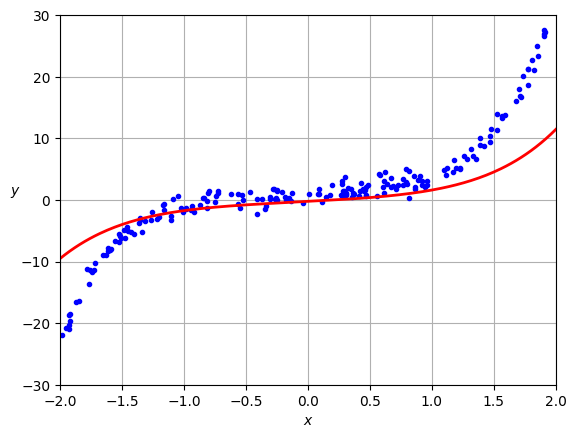

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Build a polynomial regression model with scaling
class PolynomialRegression_Scaled:
    def __init__(self, degree: int) -> None:
        np.random.seed(0)
        self.degree = degree
        self.preprocessing = make_pipeline(PolynomialFeatures(degree), StandardScaler())
        self.weights = np.random.randn(degree+1, 1) * 0.01
        
    def train(self, X_train: np.ndarray, y_train: np.ndarray, learning_rate=0.001, epochs=100):
        X_train_poly = self.preprocessing.fit_transform(X_train)
        num_samples = X_train_poly.shape[0]
        history_weights, losses = [], []
        for _ in range(epochs):
            gradients = (2 / num_samples) * X_train_poly.T.dot(X_train_poly.dot(self.weights) - y_train)
            self.weights -= learning_rate * gradients
            history_weights.append(self.weights)
            losses.append(mean_squared_error(y_train, X_train_poly.dot(self.weights)))
        history_weights, losses = np.array(history_weights), np.array(losses)
        return (history_weights, losses)

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        X_test_poly = self.preprocessing.transform(X_test)
        return X_test_poly.dot(self.weights)
    
    def plot(self, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray) -> None:
        y_pred = self.predict(X_test)

        plt.plot(X_train, y_train, "b.")
        plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
        plt.xlabel("$x$")
        plt.ylabel("$y$", rotation=0)
        plt.axis([-2, 2, -30, 30])
        plt.grid()
        plt.show()
        
degree = 5
poly_reg_scaled = PolynomialRegression_Scaled(degree)
poly_reg_scaled.train(X, y)
print(f'Coefficients of Polynomial Regression: {poly_reg_scaled.weights[0][0]:.3f}, {poly_reg_scaled.weights[1][0]:.3f}, {poly_reg_scaled.weights[2][0]:.3f}, {poly_reg_scaled.weights[3][0]:.3f}, {poly_reg_scaled.weights[4][0]:.3f}, {poly_reg_scaled.weights[5][0]:.3f}')

# Predict and Plot the results
X_test = np.linspace(-2, 2, num_samples).reshape(num_samples, 1)
poly_reg_scaled.plot(X, y, X_test)

## 3.Implement Gradient Descent Algorithms (BGD 15%, MGD 15%, SGD 15%)
Implement Batch Gradient Descent, Mini-batch Gradient Descent, and Stochastic Gradient Descent.
Train the polynomial regression model and observe the convergence speed of each algorithm.

### Utilities

In [4]:
# Gradient descent
def gradient_descent_update(X: np.ndarray, y: np.ndarray, num_samples: int, weights: np.ndarray, learning_rate: float) -> np.ndarray:
    gradients = (2 / num_samples) * X.T.dot(X.dot(weights) - y)
    return weights - learning_rate * gradients

def gradient_descent_update_clip(X: np.ndarray, y: np.ndarray, num_samples: int, weights: np.ndarray, learning_rate: float, clip_value=1e5) -> np.ndarray:
    gradients = (2 / num_samples) * X.T.dot(X.dot(weights) - y)
    gradients = np.clip(gradients, -clip_value, clip_value)
    return weights - learning_rate * gradients

# Loss function: MSE
def MSE(y_true: np.ndarray, y_pred:np.ndarray) -> float:
    return np.mean((y_true - y_pred) ** 2)

# Loss function: RMSE
def RMSE(y_true: np.ndarray, y_pred:np.ndarray) -> float:
    return np.sqrt(MSE(y_true, y_pred))

def plot_loss(losses, algo_name, step=100):
    plt.plot(np.arange(step), losses[:step], label=algo_name)
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Convergence of Gradient Descent Algorithms")
    plt.grid()
    plt.show()

In [5]:
# Define hyperparameters and initial weights
learning_rate = 0.001
epochs = 100
# weights_init_special = np.linalg.inv((X_poly.T).dot(X_poly)).dot(X_poly.T).dot(y)

### Batch Gradient Descent

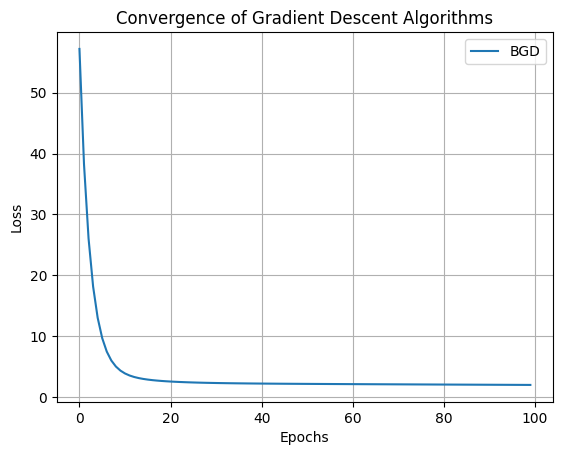

In [6]:
# Batch Gradient Descent
def BGD(X: np.ndarray, y: np.ndarray, weights: np.ndarray, learning_rate=0.001, epochs=100):
    num_samples = X.shape[0]
    history_weights, losses = [], []
    for _ in range(epochs):
        weights = gradient_descent_update(X, y, num_samples, weights, learning_rate)
        history_weights.append(weights)
        losses.append(mean_squared_error(y, X.dot(weights)))
    history_weights, losses = np.array(history_weights), np.array(losses)
    return (history_weights, losses)

poly_reg_bgd = PolynomialRegression(degree)
history_weights_bgd, losses_bgd = BGD(poly_reg_bgd.poly_features.fit_transform(X), y, poly_reg_bgd.weights, learning_rate, epochs)
plot_loss(losses_bgd, "BGD")

### Mini-batch Gradient Descent

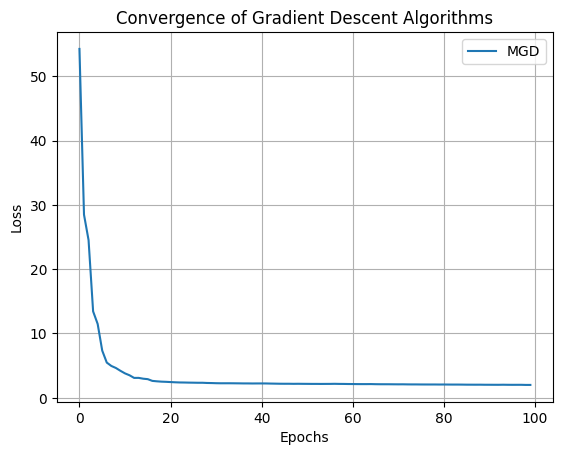

In [7]:
# Mini-batch Gradient Descent
def MGD(X: np.ndarray, y: np.ndarray, weights: np.ndarray, batch_size=32, learning_rate=0.001, epochs=100):
    num_samples = X.shape[0]    # 200
    history_weights, losses = [], []
    for epoch in range(epochs):
        shuffled_indices = np.random.permutation(num_samples)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        for i in range(0, num_samples, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            weights = gradient_descent_update(X_batch, y_batch, batch_size, weights, learning_rate)
            history_weights.append(weights)
            losses.append(mean_squared_error(y, X.dot(weights)))
    history_weights, losses = np.array(history_weights), np.array(losses)
    return (history_weights, losses)

poly_reg_mgd = PolynomialRegression(degree)
batch_size = 16
history_weights_mgd, losses_mgd = MGD(poly_reg_mgd.poly_features.fit_transform(X), y, poly_reg_mgd.weights, batch_size, learning_rate, epochs)
plot_loss(losses_mgd, "MGD")

### Stochastic Gradient Descent

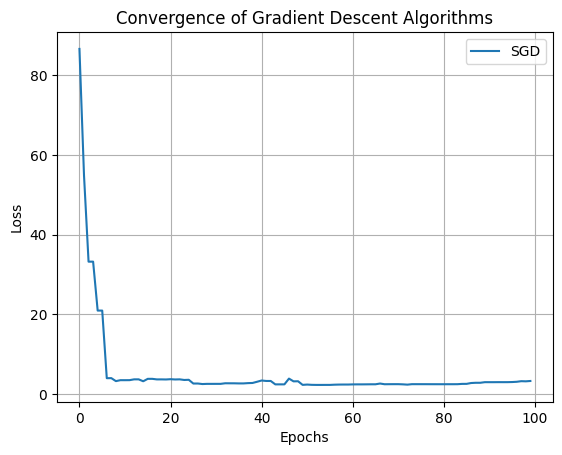

In [8]:
# Stochastic Gradient Descent
def SGD(X: np.ndarray, y: np.ndarray, weights: np.ndarray, learning_rate=0.001, epochs=100):
    num_samples = X.shape[0]
    history_weights, losses = [], []
    for _ in range(epochs):
        for _ in range(num_samples):
            random_index = np.random.randint(num_samples)
            X_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]
            weights = gradient_descent_update(X_i, y_i, 1, weights, learning_rate)
            history_weights.append(weights)
            losses.append(mean_squared_error(y, X.dot(weights)))
    history_weights, losses = np.array(history_weights), np.array(losses)
    return (history_weights, losses)

poly_reg_sgd = PolynomialRegression(degree)
history_weights_sgd, losses_sgd = SGD(poly_reg_sgd.poly_features.fit_transform(X), y, poly_reg_sgd.weights, learning_rate, epochs)
plot_loss(losses_sgd, "SGD")


### Comparison of BGD, MGD and SGD

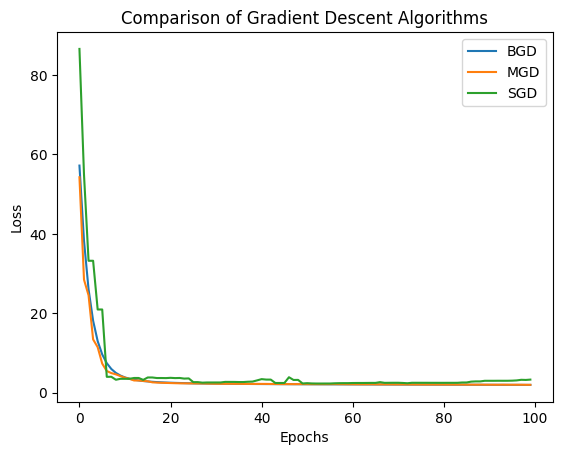

In [9]:
plt.plot(np.arange(epochs), losses_bgd[:epochs], label="BGD")
plt.plot(np.arange(epochs), losses_mgd[:epochs], label="MGD")
plt.plot(np.arange(epochs), losses_sgd[:epochs], label="SGD")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparison of Gradient Descent Algorithms")
plt.show()

## 4.Visualize Parameter Updates (15%)
Visualize the parameter update process for the three algorithms. Plot the evolution of $\theta_0$ ~ $\theta_5$.







In [10]:
def plot_weights(weights, algo_name, step=100):
    plt.plot(np.arange(step), weights[:step, 0], label='$\\theta_0$')
    plt.plot(np.arange(step), weights[:step, 1], label='$\\theta_1$')
    plt.plot(np.arange(step), weights[:step, 2], label='$\\theta_2$')
    plt.plot(np.arange(step), weights[:step, 3], label='$\\theta_3$')
    plt.plot(np.arange(step), weights[:step, 4], label='$\\theta_4$')
    plt.plot(np.arange(step), weights[:step, 5], label='$\\theta_5$')
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Weights")
    plt.title(f"Parameter Updates of {algo_name}")
    plt.grid()
    plt.show()

### BGD

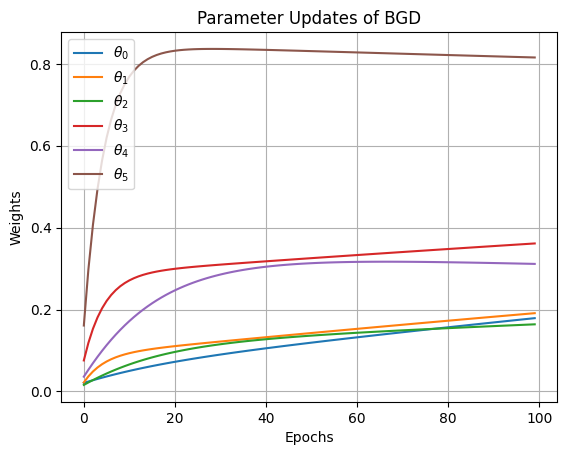

In [11]:
plot_weights(history_weights_bgd, "BGD")

### MGD

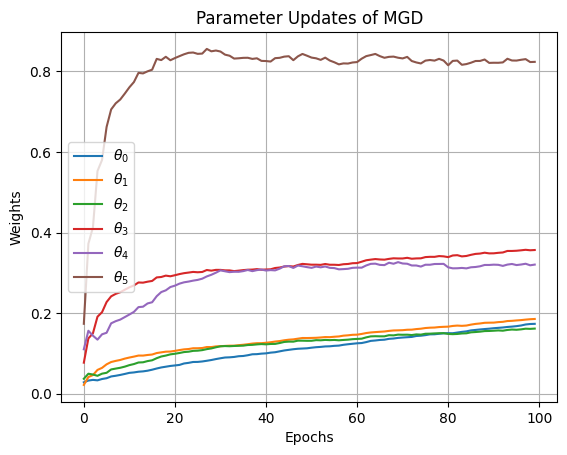

In [12]:
plot_weights(history_weights_mgd, "MGD")

### SGD

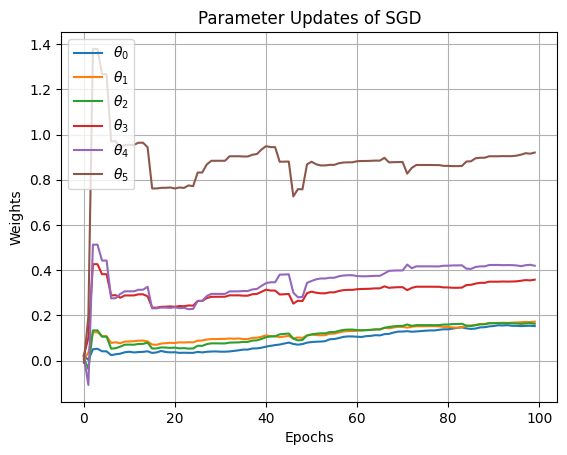

In [13]:
plot_weights(history_weights_sgd, "SGD")

## 5.Implement Early Stopping(15%)
Implement Early Stopping to terminate training, you can set the patience to a value of your choice.

In [14]:
from copy import deepcopy

# Build a polynomial regression model with early stopping
class PolynomialRegression_EarlyStopping:
    def __init__(self, degree: int) -> None:
        np.random.seed(0)
        self.degree = degree
        self.poly_features = PolynomialFeatures(degree=degree)
        self.weights = np.random.randn(degree+1, 1) * 0.01
        
    def train_early_stop(self, X_train: np.ndarray, y_train: np.ndarray, X_val: np.ndarray, y_val: np.ndarray, 
                         learning_rate=0.001, epochs=100, patience=5):
        X_train_poly = self.poly_features.fit_transform(X_train)
        num_samples = X_train_poly.shape[0]
        
        history_weights, train_losses, val_losses = [], [], []
        best_val_loss = np.inf
        best_weights = None
        epochs_without_improvement = 0
        
        for epoch in range(epochs):
            y_val_pred = self.predict(X_val)
            val_loss = mean_squared_error(y_val, y_val_pred)
            
            # Early Stopping Logic
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_weights = deepcopy(self.weights)
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1
            
            if epochs_without_improvement >= patience:
                print(f"Early stopping at epoch {epoch}")
                break
            
            gradients = (2 / num_samples) * X_train_poly.T.dot(X_train_poly.dot(self.weights) - y_train)
            self.weights -= learning_rate * gradients
            train_loss = mean_squared_error(y_train, X_train_poly.dot(self.weights))
            
            history_weights.append(self.weights)
            train_losses.append(train_loss)
            val_losses.append(val_loss)
            
            if epoch == epochs - 1:
                print(f"No early stopping happens.")

        print(f"Best validation loss: {best_val_loss:.3f}")
        self.weights = best_weights
        
        history_weights, train_losses, val_losses = np.array(history_weights), np.array(train_losses), np.array(val_losses)
        return (history_weights, train_losses, val_losses)

    def predict(self, X_test: np.ndarray) -> np.ndarray:
        X_test_poly = self.poly_features.transform(X_test)
        return X_test_poly.dot(self.weights)

Early stopping at epoch 988
Best validation loss: 0.811


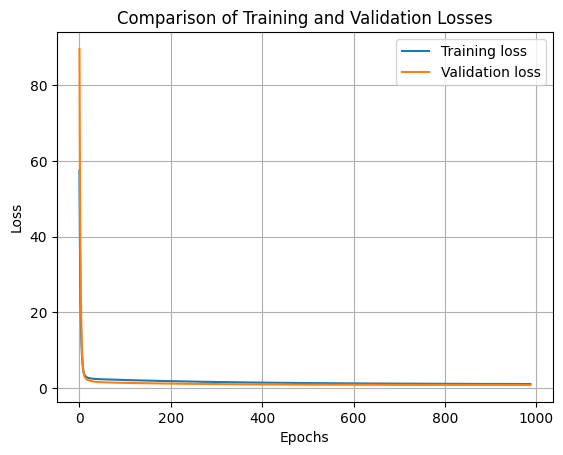

In [17]:
X_train, y_train = X[: num_samples * 4 // 5], y[: num_samples * 4 // 5]  # X_train.shape = (160, 1), y_train.shape = (160, 1)
X_val, y_val = X[num_samples * 4 // 5 :], y[num_samples * 4 // 5 :]

degree = 5
poly_reg_early_stop = PolynomialRegression_EarlyStopping(degree)
epochs = 1000
patience = 5

history_weights, train_losses, val_losses = poly_reg_early_stop.train_early_stop(X_train, y_train, X_val, y_val, learning_rate, epochs, patience)

plt.plot(np.arange(len(val_losses)), train_losses, label="Training loss")
plt.plot(np.arange(len(val_losses)), val_losses, label="Validation loss")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparison of Training and Validation Losses")
plt.grid()
plt.show()